### Import Libraries

* pandas for handling csv input files
* numpy for matrix operations and other utility functions like zeroes, mean, max, min etc
* math for floor and ceil while plotting regression line
* pyplot to construct regression lines and cost graph
* sklearn.model_selection to create train test split on the dataset based on a random state generator

In [382]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

read the csv files, for the sake of simplicity we only use 1 independent and 1 dependent variable for now.
We select time_study as independent value, since marks changes based on the value of time_study

In [383]:
df = pd.read_csv('Student_Marks.csv')
df.head(10)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [384]:
# retrieve first column of dataset, time_study
# could use a dynamic approach to get input size and all, for now we hardcode it
x = df.iloc[:, 1]

# get dependent variable (marks)
y = df.iloc[:, -1]

# generate train-test split in 1:3 ratio, random state to ensure uniform input across all instances
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/3, random_state = 0)


# convert pandas dataframe to numpy to handle matrix dot products, vector dot products etc
xtrain = xtrain.to_numpy()
ytrain = ytrain.to_numpy()

print("independent variable: ", xtrain, sep="\n")
print("dependent variable: ", ytrain, sep="\n")

independent variable: 
[4.13  4.378 7.711 7.641 4.869 6.954 0.096 2.438 3.591 2.754 7.811 4.26
 6.08  0.14  6.533 3.211 2.73  7.468 4.508 4.083 0.156 6.703 0.423 7.543
 4.875 0.771 7.353 1.923 5.473 7.649 0.805 6.201 0.932 1.982 2.908 6.376
 3.977 1.299 3.913 7.163 0.309 3.948 4.733 3.919 4.633 5.985 1.407 7.283
 2.262 3.797 7.775 2.142 6.198 4.218 1.803 3.736 1.033 2.966 6.126 3.197
 6.173 0.301 0.55  0.13  4.779 1.954]
dependent variable: 
[22.184 26.532 50.986 53.359 21.379 39.952  7.734 10.844 19.771 15.725
 55.299 19.466 38.49   7.336 41.358 17.822 19.564 51.343 19.202 17.171
  9.333 40.602 12.132 43.978 28.043  7.892 42.036  8.1   27.569 51.583
  6.349 39.957 15.038 16.461 11.397 40.024 25.133  8.837 19.106 41.444
 12.027 21.4   22.073 24.451 20.398 38.278  6.623 46.453 17.705 16.703
 51.142 13.562 31.236 24.318 11.253 16.606  6.053 13.119 35.939 16.106
 30.862  5.609  6.185 12.591 22.701  9.742]


# Hyperparameters

Our regression model assumes the following relation between independent and dependent variables
$$
\displaystyle\ y = m \cdot x + c
$$

* y: dependent variable (the value of which we have to find, can be considered as label for the sake of understanding)
* x: independent variable (the input feature, based on which we have to calculate new values for y)
* weight(m): m is the slope in the context of a regression line, but in a machine learning model sense we can say it corresponds to weights
* bias(c): c is the y-intercept, can be treated as bias

the dimension of weights in a machine learning context is $a \cdot b$ matrix where a(rows) corresponds to number of neurons and b(columns) corresponds to number of input features

in our case for regression a single scalar unit as weight will suffice, since there is only 1 feature, based on increasing feature we can create a vector of size n where n = input features

In [385]:
# initialize weights and bias to 0, learning rate can be tweaked to find an optimal starting point
weight = np.float32(0.0)
bias = np.float32(0.0)
epochs = 1000
learningRate = 0.0001
errors = []

In [386]:
# helper block to see the shapes of hyperparameters and features/labels
print(xtrain.shape)
print(ytrain.shape)
print(weight.shape)
print(bias.shape)

(66,)
(66,)
()
()


# Logic

we have a set number of Epochs, the entire xtrain (input) is mapped to a output value based on hypothesis function
$$\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$$
In our case there is only one weight (since 1 input feature), the dot product between weight(scalar) and xtrain(vector) will give us a new vector of the weighted product of each input, then we add the bias term to every element in that vector

dimension of weight = ()

dimension of xtrain = (66, )

dimension of predicted = (66, )

$$
\hat{y} = predicted\newline
predicted=w \cdot xtrain\newline
predicted=\left[ \begin{array}{c}
w x_1 + b & w x_2 + b & \dots & w x_n + b
\end{array} \right]
$$

Then we calculate the error term for each of the predicted value

$$
error = y - \hat{y}\newline
y - \hat{y} = ytrain - predicted\newline

ytrain - predicted=\left[ \begin{array}{c}
y_1 - (w x_1 + b) & y_2 - (w x_2 + b) & \dots & y_n - (w x_n + b)
\end{array} \right]
$$

### Mean Squared Error (MSE)

now we've calculated the error term, in simple linear regression we use Mean Squared Error (MSE) as the cost function, which is nothing but
$$

\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2\newline


n \text{ is the number of data points,}\newline
y_i \text{ is the actual value for the \(i\)-th data point,}\newline
\hat{y}_i = w x_i + b \text{ is the predicted value.}\newline

$$

The MSE is the cost function we are trying to minimize, which measures the average of the squared differences between actual values $y_i$ and predicted values $\hat{y}_i$:



Where:


### Gradient of MSE with Respect to $w$

To perform gradient descent, we need the partial derivatives of the MSE with respect to both $w$ (slope) and $b$ (intercept). These derivatives tell us how to adjust $w$ and $b$ to reduce the error.

1. **Derivative with respect to $w$**:

The predicted value is $\hat{y}_i = w x_i + b$, so:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
$$

Taking the partial derivative of MSE with respect to $w$ (using the chain rule):

$$
\frac{\partial \text{MSE}}{\partial w} = \frac{\partial}{\partial w} \left( \frac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2 \right)
$$

Applying the chain rule to the square term:

$$
\frac{\partial \text{MSE}}{\partial w} = \frac{2}{n} \sum_{i=1}^{n} (y_i - (w x_i + b)) \cdot (-x_i)
$$

Simplifying:

$$
\frac{\partial \text{MSE}}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)
$$

The negative sign comes from the derivative of the square term $(y_i - \hat{y}_i)^2$, and $\hat{y}_i$ depends on $w$, so we ignore $y$ and have $ -(x_i) $ when differentiating $\hat{y}$ with respect to $w$.

That is,

$$
gradient = -\frac{2}{n} \cdot xtrain \cdot error
$$


In the program as I stated earlier, both error and xtrain are vectors of the same size, so to calculate the gradient with respect to $w$ we simply multiply the constant part $-\frac{2}{n}$ with the dot product of xtrain and error vectors (whose output will be a scalar unit)

$$
gradient = -\frac{2}{n} \cdot xtrain \cdot error = x \cdot \hat{y}\newline
gradient = -\frac{2}{n} \cdot (x_1 \cdot \hat{y}_1 + x_2 \cdot \hat{y}_2 + \dots + x_n \cdot \hat{y}_n)

$$



In [387]:
for i in range(epochs):
    predicted = np.dot(weight, xtrain) + bias
    error = ytrain - predicted

    # track error for plotting costgraph
    errors.append(np.mean(error ** 2))

    weightGradient = -(2/len(xtrain)) * np.dot(xtrain, error)
    biasGradient = -(2/len(xtrain)) * np.sum(error)
    
    weight = weight - learningRate * weightGradient
    bias = bias - learningRate * biasGradient
    
print("weights, bias = ", weight, bias)


weights, bias =  5.65802382770543 1.1029801906905599


In [388]:
def predict(x):
    return weight * x + bias

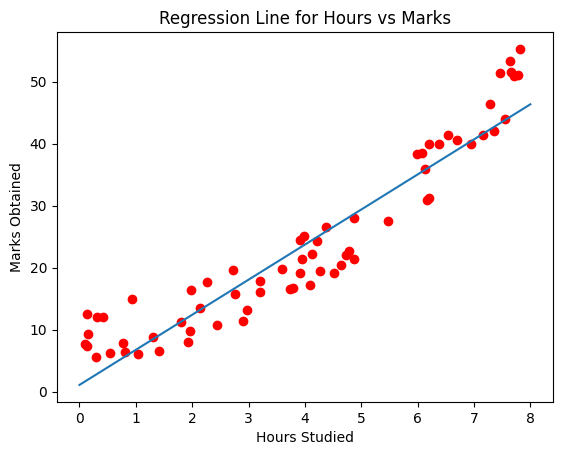

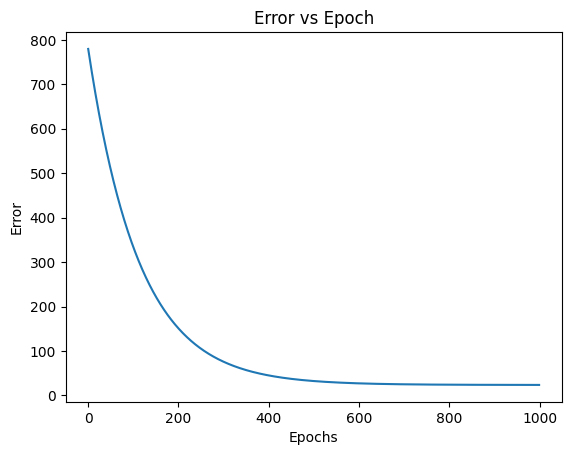

In [389]:

xMin = math.floor(min(xtrain))
xMax = math.ceil(max(xtrain))

plt.title("Regression Line for Hours vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.scatter(xtrain, ytrain, color="red")
plt.plot(list(range(xMin, xMax + 1)), [predict(x) for x in range(xMin, xMax + 1)])
plt.show()

plt.title("Error vs Epoch")
plt.ylabel("Error")
plt.xlabel("Epochs")
plt.plot(errors)